In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# Process track data

Read track data from pickle

In [2]:
df = pd.read_pickle('./data/tracks_5834a005e411dc743a5d52de.pkl')

Calculate distance deltas between track points and use this to filter out likely erroneous tracks.

In [3]:
deltas = []               
for grp, track in df.groupby('track_num'):
    deltas.append(np.diff(track['x'].values).mean() + np.diff(track['y'].values).mean())

Calculate time elapsed for each track. This will be our primary data point, we don't have rectification to convert this to direction or distance.

In [4]:
track_time = df.groupby('track_num')['timestamp'].max() - df.groupby('track_num')['timestamp'].min()
track_time = track_time[np.array(deltas) < 20]

In [5]:
track_timestamp = df.groupby('track_num')['timestamp'].min()[np.array(deltas) < 20]

Create new dataframe with only the timestamp and duration of each track post-filter.

In [6]:
dat = pd.DataFrame({'timestamp': track_timestamp.values, 'duration': track_time.values})

Add a `datetime` index and force a manual eight hour timezone correction 

In [7]:
dat['dt'] = pd.to_datetime(dat['timestamp'], unit='s')
dat['dt'] = dat['dt'] - pd.Timedelta(hours=8)
dat = dat.set_index(dat['dt'])

Create a new aggregate data set grouped hourly with mean duration and bins for the count of tracks matching or exceeding bin length.

*N.B. Bins are inclusive, eg. the 10 second bin contains all tracks over 10 seconds INCLUDING those that are also over 15 seconds.*

In [8]:
gb = dat.groupby(pd.Grouper(freq='1H'))
hourly_dat = pd.DataFrame({'dt': gb.dt.max(),
                           'mean_duration': gb.duration.mean(),
                           'track_count': gb.duration.count(),
                           'track_count_5_sec': dat[dat.duration >= 3].groupby(pd.Grouper(freq='1H')).duration.count(),
                           'track_count_10_sec': dat[dat.duration >= 10].groupby(pd.Grouper(freq='1H')).duration.count(),
                           'track_count_15_sec': dat[dat.duration >= 15].groupby(pd.Grouper(freq='1H')).duration.count()})

In [9]:
hourly_dat = hourly_dat.set_index('dt')

In [10]:
hourly_dat.index = hourly_dat.index.round('1H')

In [11]:
hourly_dat

mean_duration  track_count  track_count_5_sec  \
dt                                                                   
2019-11-15 07:00:00       8.292509           73                 56   
2019-11-15 07:00:00       8.729291           60                 42   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
2019-11-15 11:00:00       3.646135           10                  4   
2019-11-15 12:00:00       2.218406            7                  1   
2019-11-15 13:00:00       4.942529           40                 25   
2019-11-15 14:00:00       8.479365          108                 85   
2019-11-15 15:00:00       8.821481          103                 84   
2019-11-15 16:00:00       6.883984           51                 31   
2019-11-15 17:00:00       6.777699          102                 71   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
2019-11-16 07:00:00       7.805362          101                 71   
2019-11-16 08:00:00       5.465468          208                142   
2019-11-16 09:00:00       5.728124          146                 95   
2019-11-16 10:00:00       3.557775           59                 31   
2019-11-16 11:00:00      24.381552           12                  5   
2019-11-16 12:00:00       4.086882           19                  7   
...                            ...          ...                ...   
2020-01-01 10:00:00       6.060631          114                 77   
2020-01-01 11:00:00       5.199898          169                 92   
2020-01-01 12:00:00       5.597315          174                113   
2020-01-01 13:00:00       6.495217          140                 97   
2020-01-01 14:00:00       6.694392          139                 84   
2020-01-01 15:00:00       5.508744          199                127   
2020-01-01 16:00:00       5.124286          155                 82   
2020-01-01 17:00:00       4.309697           84                 38   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
NaT                            NaN            0                  0   
2020-01-02 07:00:00      11.481539            6                  4   
2020-01-02 08:00:00       9.650451           79                 63   
2020-01-02 09:00:00       7.853711          146                101   
2020-01-02 10:00:00       9.222

# Process crowd counts

In [18]:
crowd_dat = pd.read_pickle('./data/crowd_counts_5834a005e411dc743a5d52de.pkl')

In [19]:
crowd_dat['dt'] = pd.to_datetime(crowd_dat['timestamp'], unit='s')
crowd_dat['dt'] = crowd_dat['dt'] - pd.Timedelta(hours=8)
crowd_dat = crowd_dat.set_index(crowd_dat['dt'])

dt
2019-11-18 06:24:58    14
2019-11-18 06:29:23    14
2019-11-18 06:34:28    23
2019-11-18 06:39:29    26
2019-11-18 06:44:30    24
2019-11-18 06:49:31    26
2019-11-18 06:54:32    24
2019-11-18 06:59:32    20
2019-11-18 07:04:34    19
2019-11-18 07:09:33    22
2019-11-18 07:14:36    22
2019-11-18 07:19:38    24
2019-11-18 07:24:37    20
2019-11-18 07:29:39    18
2019-11-18 07:34:42    21
2019-11-18 07:39:42    25
2019-11-18 07:44:44    24
2019-11-18 07:49:45    25
2019-11-18 07:54:48    31
2019-11-18 07:59:49    33
2019-11-18 08:04:50    31
2019-11-18 08:09:55    28
2019-11-18 08:14:57    25
2019-11-18 08:20:00    28
2019-11-18 08:25:00    38
2019-11-18 08:30:00    31
2019-11-18 08:35:05    29
2019-11-18 08:40:06    34
2019-11-18 08:45:06    38
2019-11-18 08:50:08    37
                       ..
2019-12-31 14:18:00    19
2019-12-31 14:23:04    23
2019-12-31 14:28:12    20
2019-12-31 14:33:12    21
2019-12-31 14:38:08    13
2019-12-31 14:43:12     7
2019-12-31 14:48:17     4
2019-12-3

In [21]:
hourly_dat['crowd'] = crowd_dat.groupby(pd.Grouper(freq='1H')).surf.max()

In [22]:
hourly_dat = hourly_dat.dropna()

In [23]:
hourly_dat

mean_duration  track_count  track_count_5_sec  \
dt                                                                   
2019-11-15 11:00:00       3.646135           10                  4   
2019-11-15 12:00:00       2.218406            7                  1   
2019-11-15 13:00:00       4.942529           40                 25   
2019-11-15 14:00:00       8.479365          108                 85   
2019-11-15 15:00:00       8.821481          103                 84   
2019-11-15 16:00:00       6.883984           51                 31   
2019-11-17 07:00:00       8.869711          106                 86   
2019-11-17 08:00:00       7.310561          260                185   
2019-11-17 09:00:00       6.042810          180                115   
2019-11-17 10:00:00       5.185964          160                 99   
2019-11-17 11:00:00       5.833309          191                119   
2019-11-17 12:00:00       5.881704          112                 60   
2019-11-17 13:00:00       6.616238          166                116   
2019-11-17 14:00:00       7.049111          204                145   
2019-11-17 15:00:00       8.437279          379                306   
2019-11-17 16:00:00       7.351186          349                259   
2019-11-18 07:00:00       9.136121          118                 97   
2019-11-18 08:00:00       9.149828          252                205   
2019-11-18 09:00:00       8.294383          295                232   
2019-11-18 10:00:00       7.804428          272                196   
2019-11-18 11:00:00       7.034209          255                185   
2019-11-18 12:00:00       5.870922          168                111   
2019-11-18 13:00:00       6.971316          112                 74   
2019-11-18 14:00:00       5.966156          115                 82   
2019-11-18 15:00:00       8.747759          148                120   
2019-11-18 16:00:00       8.292722          232                176   
2019-11-19 07:00:00       8.552387           80                 64   
2019-11-19 08:00:00       7.521255          201                151   
2019-11-19 09:00:00       9.434071          170                141   
2019-11-19 10:00:00       7.764805          286                225   
...                            ...          ...                ...   
2019-12-27 16:00:00       1.646257            1                  0   
2019-12-28 08:00:00       3.292593           13                  6   
2019-12-28 09:00:00       2.714631           12                  3   
2019-12-28 12:00:00       2.961891            3                  2   
2019-12-28 13:00:00       6.351094           30                  9   
2019-12-28 14:00:00       5.426759          141                 80   
2019-12-28 15:00:00       5.375010          127                 74   
2019-12-28 16:00:00       4.379381          145                 82   
2019-12-29 10:00:00      10.483581            5                  3   
2019-12-29 11:00:00       4.389204            2                  1   
2019-12-29 12:00:00       1.985945            3                  1   
2019-12-29 13:00:00      14.420618            1                  1   
2019-12-29 14:00:00       6.478001           23                 16   
2019-12-29 15:00:00       7.372914           48                 31   
2019-12-29 16:00:00       6.817152          120                 75   
2019-12-30 08:00:00       3.860442            1                  1   
2019-12-30 10:00:00       4.585116            3                  2   
2019-12-30 12:00:00       0.696363            1                  0   
2019-12-30 12:00:00       2.837314            2                  1   
2019-12-30 14:00:00       1.742992            1                  0   
2019-12-30 16:00:00       3.893749            2                  2   
2019-12-31 08:00:00       4.741370           12                  4   
2019-12-31 09:00:00       6.881411           84                 53   
2019-12-31 10:00:00       5.898607          118                 70   
2019-12-31 11:00:00       5.932

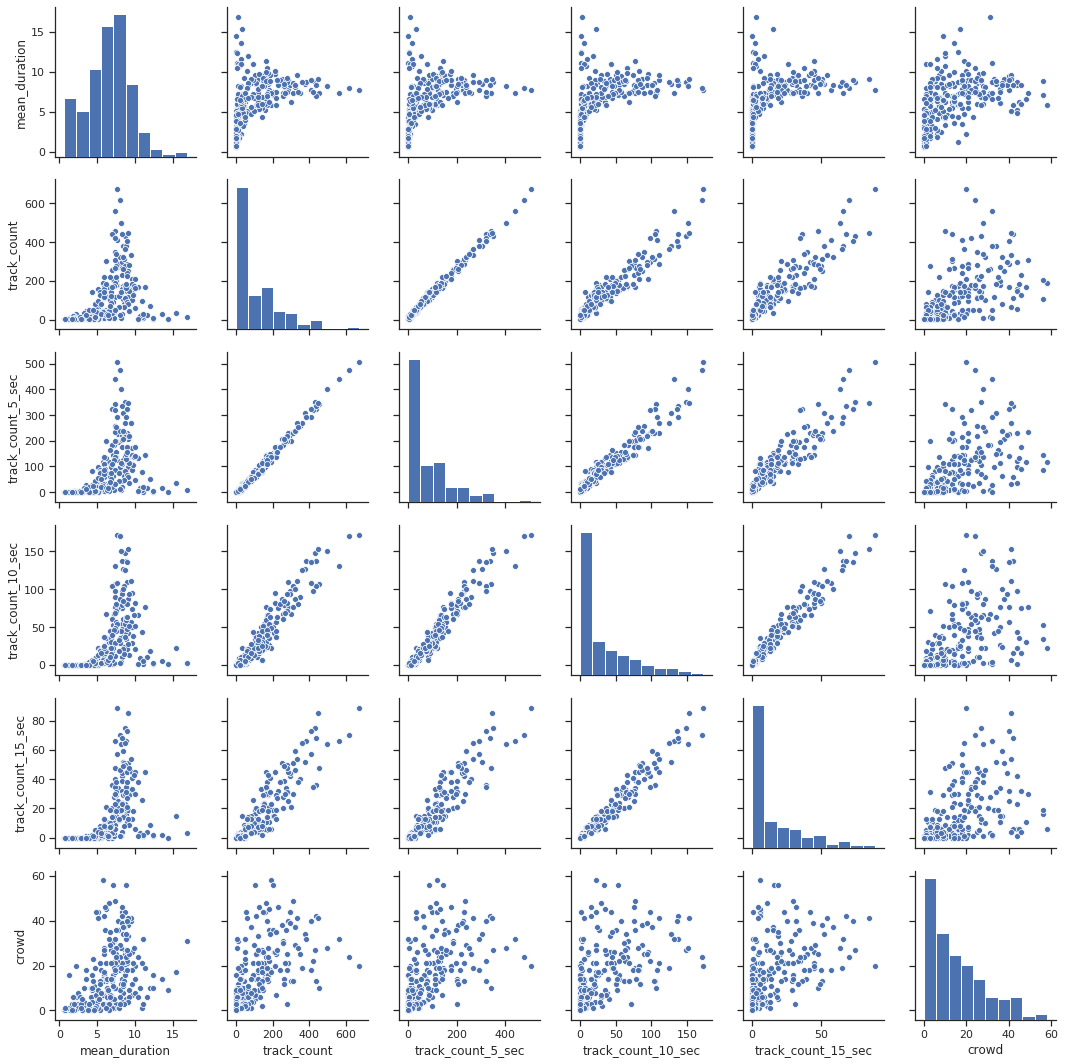

In [24]:
sns.pairplot(hourly_dat)

In [26]:
hourly_dat[hourly_dat.index.dayofyear==353]

mean_duration  track_count  track_count_5_sec  \
dt                                                                   
2019-12-19 07:00:00      12.421919            2                  2   
2019-12-19 14:00:00       8.376923           65                 44   
2019-12-19 15:00:00       9.229926          147                113   
2019-12-19 16:00:00       7.875178          120                 76   

                     track_count_10_sec  track_count_15_sec  crowd  
dt                                                                  
2019-12-19 07:00:00                   1                   1   16.0  
2019-12-19 14:00:00                  21                  14   11.0  
2019-12-19 15:00:00                  52                  29    9.0  
2019-12-19 16:00:00                  33                  12   18.0

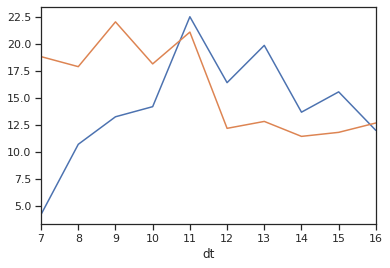

In [34]:
hourly_dat.groupby(hourly_dat.index.hour).track_count_15_sec.mean().plot()
hourly_dat.groupby(hourly_dat.index.hour).crowd.mean().plot()